## Hiragana
use CNN to learn

In [271]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
# np.random.seed(1337)  # for reproducibility

from sklearn.model_selection import train_test_split

# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils

#for CNN model
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [272]:
import tensorflow
tensorflow.__version__


'2.7.0'

In [273]:
## import data
img_test = cv.imread("hiragana-dataset-master/hiragana_images/kanaBA0.jpg", cv.IMREAD_GRAYSCALE)
# print(img_test.shape)
(img_rows, img_cols) = img_test.shape
print(img_test)
print((img_rows, img_cols))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(84, 83)


The shape of each picture is 84x83.
50 hiraganas in the dataset, each having twenty pctures.

In [274]:
## extract the romanji from a filename
import re
# hiragana-dataset-master/hiragana_images/kanaBA0.jpg
def get_romanji(filename):
    keyword = re.search(r'kana(\w+?)\d+', filename).group(1)
    # print(keyword)
    return keyword.lower()
    # pass

get_romanji("hiragana-dataset-master/hiragana_images/kanaBA0.jpg")

'ba'

In [275]:
## import data into a list
## construct datatable
import os
import pandas as pd

handwriting_list = []
dir_name = "hiragana-dataset-master/hiragana_images"
# os.listdir(dir_name)
for filename in os.listdir(dir_name):
    # print(f"{dir_name}/f{filename}.jpg")
    picture_label_list = [cv.imread(f"{dir_name}/{filename}", cv.IMREAD_GRAYSCALE), filename, get_romanji(filename)]
    handwriting_list.append(picture_label_list)
# print(handwriting_list)

handwriting_table = pd.DataFrame(handwriting_list, columns=["Handwriting", "Filename", "Romanji"])
handwriting_table

,Handwriting,Filename,Romanji
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaA0.jpg,a
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaA1.jpg,a
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaA10.jpg,a
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaA11.jpg,a
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaA12.jpg,a
...,...,...,...
995,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaYU5.jpg,yu
996,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaYU6.jpg,yu
997,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaYU7.jpg,yu
998,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaYU8.jpg,yu


In [277]:
def romanji_to_dict(S): # construct dict from Romanji series
    romanji_list = list(set(S))
    romanji_dict = {}
    for i, romanji in enumerate(romanji_list):
        romanji_dict[romanji] = i
    return romanji_dict

test_list = ["a", "i", "u", "e", "o", "ka"]
test_categories = len(test_list)
test_table = handwriting_table[handwriting_table["Romanji"].isin(test_list)]
# test_index = list(range(test_categories))
zzz = romanji_to_dict(test_table["Romanji"])
print(zzz)
test_table["Label"] = test_table["Romanji"].map(lambda x: zzz[x])
# test_table[test_table["Romanji"] == "ka"]
test_table

{'e': 0, 'a': 1, 'u': 2, 'i': 3, 'ka': 4, 'o': 5}


<ipython-input-277-6bf1289f4b86>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_table["Label"] = test_table["Romanji"].map(lambda x: zzz[x])


,Handwriting,Filename,Romanji,Label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaA0.jpg,a,1
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaA1.jpg,a,1
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaA10.jpg,a,1
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaA11.jpg,a,1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaA12.jpg,a,1
...,...,...,...,...
895,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaU5.jpg,u,2
896,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaU6.jpg,u,2
897,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaU7.jpg,u,2
898,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",kanaU8.jpg,u,2


In [278]:
X = test_table["Handwriting"].to_numpy()
y = test_table["Label"].to_numpy()
# X = X.reshape(X.shape[0], img_rows, img_cols, 1)
X = np.array([X[i].reshape(img_rows, img_cols) for i in range(X.shape[0])])
X.shape
# X
X = X.reshape(X.shape[0], img_rows, img_cols, 1)
X.shape

(120, 84, 83, 1)

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #shuffle=True
# y_test
Y_train = np_utils.to_categorical(y_train, test_categories)
Y_test = np_utils.to_categorical(y_test, test_categories)
# print(Y_test)
# X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
# X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
print(X_train.shape)
# print(X_train)

(96, 84, 83, 1)


standarize the strength of each pixel from 0-255 to 0-1

In [289]:
## std X
def std_X(X):
    X = X.astype('float32')/255
    # X /= 255
    return X

X_train = std_X(X_train)
X_test = std_X(X_test)


In [290]:
input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(test_categories, activation='softmax'))

print('model.summary:')
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


model.summary:
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 84, 83, 32)        320       
                                                                 
 conv2d_20 (Conv2D)          (None, 84, 83, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 42, 41, 64)       0         
 2D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 42, 41, 64)        0         
                                                                 
 flatten_8 (Flatten)         (None, 110208)            0         
                                                                 
 dense_16 (Dense)            (None, 128)               14106752  
                                      

# Augmentation
Use the augmentation to generate more data from the training data.
Use rotate, height transform, width transform to simulate all kinds of handwritings

In [306]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Range for picking a value from.
datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    # shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    validation_split=0.25) #     validation_split=0.2


In [307]:
batch_size = 128
nb_epoch = 12

# generate data with datagen
datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:
train_history = model.fit(datagen.flow(X_train, Y_train, batch_size=32, subset='training'), #
         validation_data=datagen.flow(X_train, Y_train, batch_size=8, subset='validation'),
        #  validation_data=(X_test, Y_test), batch_size=batch_size, 
         epochs=nb_epoch, verbose=1)


Epoch 1/12
3/3 [==============================] - 1s 366ms/step - loss: 0.3149 - accuracy: 0.8889 - val_loss: 0.1042 - val_accuracy: 1.0000
Epoch 2/12
3/3 [==============================] - 1s 474ms/step - loss: 0.2067 - accuracy: 0.9306 - val_loss: 0.0923 - val_accuracy: 1.0000
Epoch 3/12
3/3 [==============================] - 1s 357ms/step - loss: 0.2594 - accuracy: 0.9028 - val_loss: 0.0290 - val_accuracy: 1.0000
Epoch 4/12
3/3 [==============================] - 1s 362ms/step - loss: 0.2923 - accuracy: 0.9028 - val_loss: 0.0802 - val_accuracy: 0.9583
Epoch 5/12
3/3 [==============================] - 1s 478ms/step - loss: 0.0947 - accuracy: 0.9722 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 6/12
3/3 [==============================] - 1s 362ms/step - loss: 0.1606 - accuracy: 0.9306 - val_loss: 0.2253 - val_accuracy: 0.8750
Epoch 7/12
3/3 [==============================] - 1s 395ms/step - loss: 0.1097 - accuracy: 0.9861 - val_loss: 0.0540 - val_accuracy: 1.0000
Epoch 8/12
3/3 [====

# Model Evaluation
evaluate the model with test data

In [308]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 81ms/step - loss: 0.0031 - accuracy: 1.0000
Test score: 0.0031441058963537216
Test accuracy: 1.0


In [309]:
zzz


{'e': 0, 'a': 1, 'u': 2, 'i': 3, 'ka': 4, 'o': 5}

{0: 'e', 1: 'a', 2: 'u', 3: 'i', 4: 'ka', 5: 'o'}
24


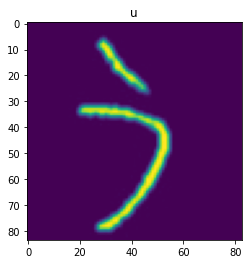

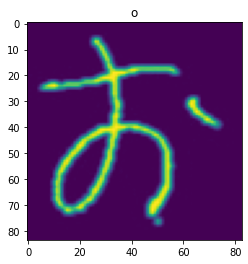

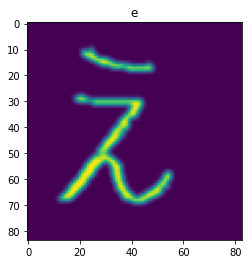

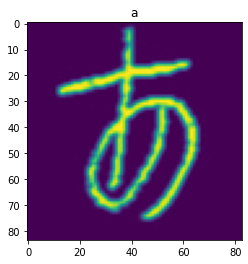

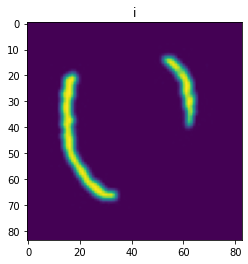

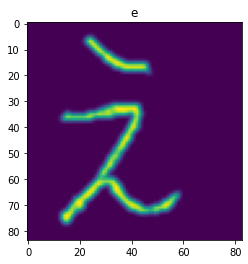

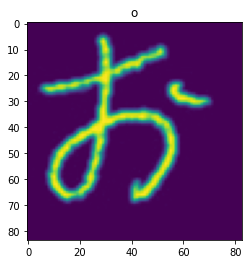

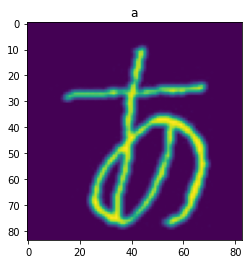

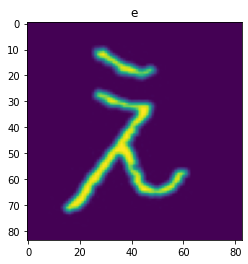

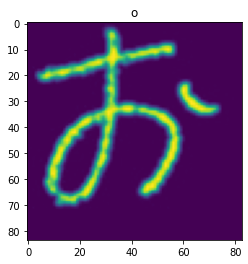

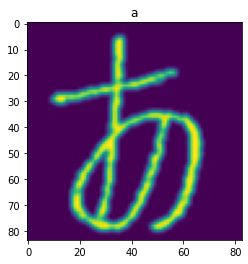

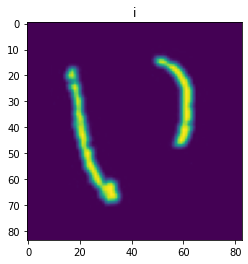

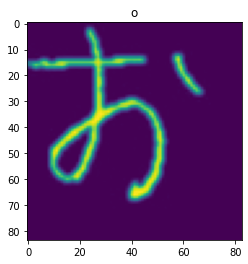

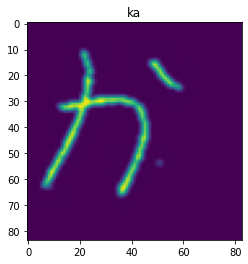

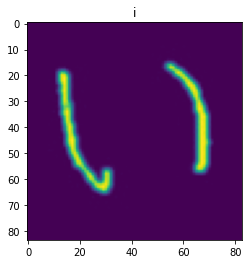

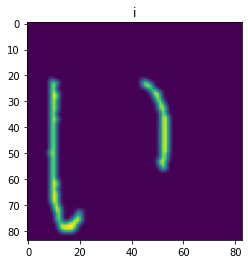

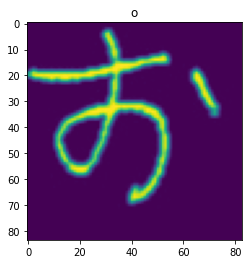

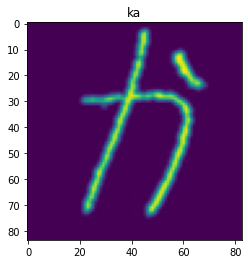

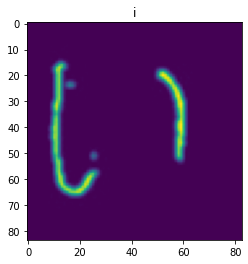

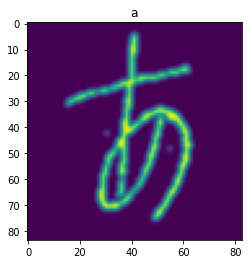

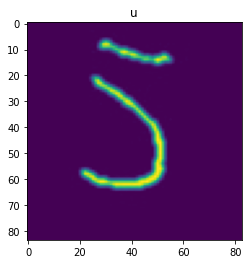

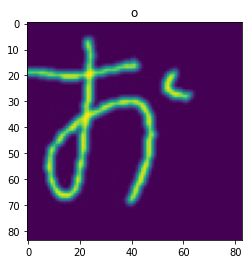

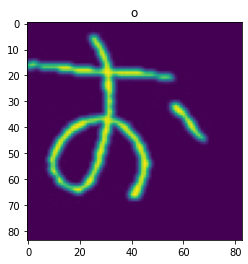

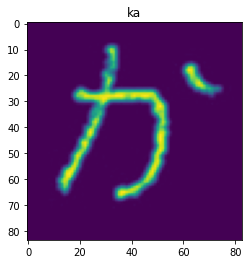

[2 5 0 1 3 0 5 1 0 5 1 3 5 4 3 3 5 4 3 1 2 5 5 4]
[2 5 0 1 3 0 5 1 0 5 1 3 5 4 3 3 5 4 3 1 2 5 5 4]
[]
Number of errors = 0/24


In [310]:
rev_zzz = dict((v,k) for k,v in zzz.items())

print(rev_zzz)

nVal=X_test.shape[0]
print(nVal)
prob = model.predict(X_test)
# print(prob)
predictions=np.argmax(prob,axis=1)
for X, prediction in zip(X_test, predictions):
    plt.title(rev_zzz[prediction])
    plt.imshow(X)
    plt.show()
print(predictions)
ground_truth=y_test
print(ground_truth)
#ground_truth=np.argmax(y_test[:],axis=1)
errors = np.where(predictions != ground_truth)[0]
print(errors)
print("Number of errors = {}/{}".format(len(errors),nVal))

# Test the model with our handwritings

In [311]:
a_doggies = []
for file in os.listdir("a_doggy"):
    img = cv.imread(f"a_doggy/{file}", cv.IMREAD_GRAYSCALE)
    ret, img = cv.threshold(img,125,255,cv.THRESH_BINARY_INV)
    # print(img.shape)
    c_axis = img.sum(axis=0)
    # print(c_axis)
    # print(c_axis.shape)
    c_axis = np.nonzero(c_axis)[0]
    # print(c_axis)
    # print(c_axis.shape)
    c_min, c_max = max(0, c_axis[0] - 10), min(img.shape[1], c_axis[-1] + 10)
    # print(c_min, c_max)
    r_axis = img.sum(axis=1)
    r_axis = np.nonzero(r_axis)[0]
    r_min, r_max = max(0, r_axis[0] - 10), min(img.shape[0], r_axis[-1] + 10)
    img = img[r_min:r_max, c_min:c_max]
    img = cv.resize(img, (83, 84))
    a_doggies.append(img)
    # plt.imshow(img, cmap=plt.get_cmap('gray'))
    # plt.show()

a_doggies = np.array(a_doggies)
# a_doggy = cv.imread("a_doggy.jpg", cv.IMREAD_GRAYSCALE)
# a_doggy = a_doggy[30:125, 30:120]
# a_doggy = cv.resize(a_doggy, (84, 83))
# pixels = a_doggy.flatten()
# # plt.hist(pixels)
# ret, a_doggy = cv.threshold(a_doggy,125,255,cv.THRESH_BINARY_INV)
# plt.imshow(a_doggy, cmap=plt.get_cmap('gray'))
# plt.show()
# a_doggy.shape

(8, 84, 83, 1)
[0 1 3 2 2 5 0 4]


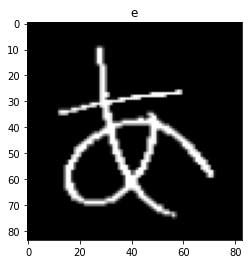

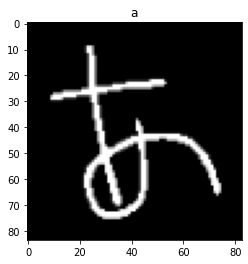

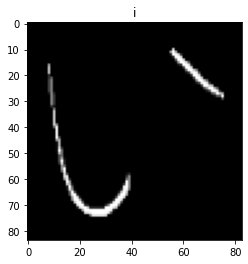

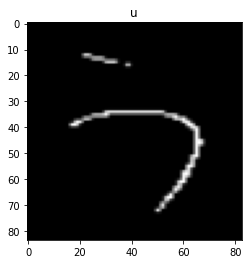

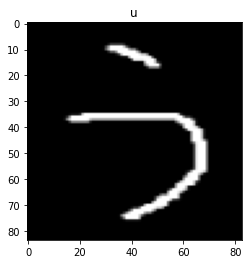

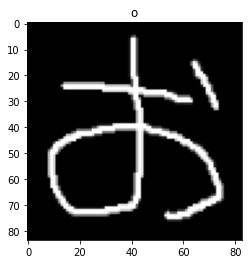

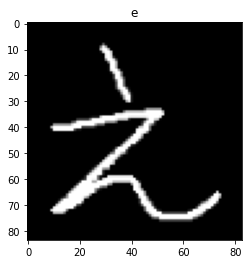

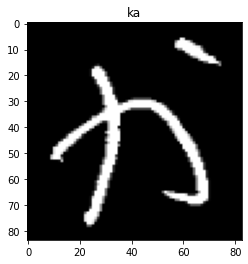

In [312]:
a_doggies = a_doggies.reshape(len(a_doggies), 84, 83, 1)
a_doggies = std_X(a_doggies)
print(a_doggies.shape)
prob_dog = model.predict(a_doggies)
predictions_dog = np.argmax(prob_dog,axis=1)
print(predictions_dog)
prediction_a_dog = [rev_zzz[prediction] for prediction in predictions_dog]
for a, a_doggy in zip(prediction_a_dog, a_doggies):
    plt.title(a)
    plt.imshow(a_doggy, cmap=plt.get_cmap('gray'))
    plt.show()